In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.neural_network import MLPClassifier

In [2]:
bank=pd.read_csv("Bank Dataset.csv")

In [3]:
bank.head()

,ID,Age,Experience,Income,ZIP_Code,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4982 entries, 0 to 4981
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4982 non-null   int64  
 1   Age                 4982 non-null   int64  
 2   Experience          4982 non-null   int64  
 3   Income              4982 non-null   int64  
 4   ZIP_Code            4982 non-null   int64  
 5   Family_members      4982 non-null   int64  
 6   CCAvg               4982 non-null   float64
 7   Education           4982 non-null   int64  
 8   Mortgage            4982 non-null   int64  
 9   Personal_Loan       4982 non-null   int64  
 10  Securities_Account  4982 non-null   int64  
 11  CD_Account          4982 non-null   int64  
 12  Online              4982 non-null   int64  
 13  CreditCard          4982 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 545.0 KB


In [5]:
bank = bank.drop(['ID','ZIP_Code'], axis=1)
bank.head()

,Age,Experience,Income,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
y = bank['Personal_Loan']
x = bank.drop(['Personal_Loan'], axis=1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state=27)

In [13]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.000001)

In [35]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 2.15707163
Iteration 2, loss = 0.57594503
Iteration 3, loss = 0.35901996
Iteration 4, loss = 0.37422449
Iteration 5, loss = 0.41921534
Iteration 6, loss = 0.40398474
Iteration 7, loss = 0.26669725
Iteration 8, loss = 0.27319694
Iteration 9, loss = 0.25884715
Iteration 10, loss = 0.23701541
Iteration 11, loss = 0.27307898
Iteration 12, loss = 0.21682437
Iteration 13, loss = 0.27179840
Iteration 14, loss = 0.26791040
Iteration 15, loss = 0.26781408
Iteration 16, loss = 0.22948018
Iteration 17, loss = 0.22858683
Iteration 18, loss = 0.24509569
Iteration 19, loss = 0.25423595
Iteration 20, loss = 0.22222247
Iteration 21, loss = 0.23737700
Iteration 22, loss = 0.21583506
Iteration 23, loss = 0.22218671
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1322,   32],
       [ 101,   40]], dtype=int64)

In [38]:
pred2 = clf.predict(x_train)
confusion_matrix(y_train,pred2)

array([[3092,   58],
       [ 262,   75]], dtype=int64)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1354
           1       0.56      0.28      0.38       141

    accuracy                           0.91      1495
   macro avg       0.74      0.63      0.66      1495
weighted avg       0.89      0.91      0.90      1495



In [40]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3150
           1       0.56      0.22      0.32       337

    accuracy                           0.91      3487
   macro avg       0.74      0.60      0.63      3487
weighted avg       0.89      0.91      0.89      3487



In [41]:
import matplotlib.pyplot as plt

AUC: 0.924


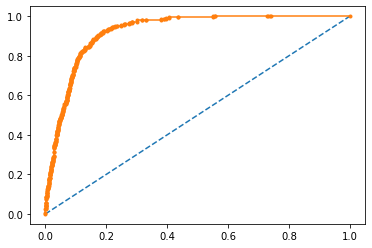

In [42]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.925


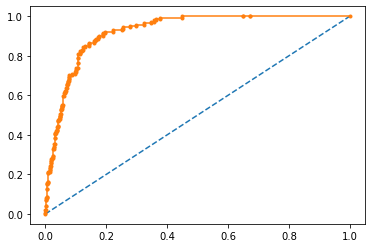

In [43]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()